In [1]:
# importing libs
import pandas as pd
import re

###### In this project, we (Daniel Gyebnar and Salga Benjamin) want to analyze how governmental spending on schools affects the performance of the students. The main goal is to merge 3 datasets (education expenditure, Times data, country codes) and make an analysis of them to find answers to our question.
## Loading datasets
###### We used from Kaggle World University Ranking dataset education_expenditure and Times_data tables.

In [2]:
# loading the education expenditure
url1="https://raw.githubusercontent.com/DaniDataScience/Python_coding_3/main/education_expenditure.csv"
edu_exp=pd.read_csv('education_expenditure.csv')
edu_exp.head()

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN


In [3]:
# loading the Times data set
times_data=pd.read_csv("https://raw.githubusercontent.com/DaniDataScience/Python_coding_3/main/times_Data_er.csv")
times_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33;67,2011
2,3,Massachusetts Institute of Technology,United States,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37;63,2011
3,4,Stanford University,United States,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,1.79,2011
4,5,Princeton University,United States,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,1.91,2011


In [4]:
# loading country codes
url3='https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv'
codes=pd.read_csv(url3)
codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


### Cleaning Times data set

#### First we identify NA values and dropping them

In [5]:
times_data.isna().sum(axis=0)

world_rank                   0
university_name              0
country                      0
teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
female_male_ratio          236
year                         0
dtype: int64

In [6]:
times_data = times_data.dropna()
times_data.isna().sum(axis=0)

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [7]:
len(times_data)

954

#### Checking data dtypes. Columns with objects as type probably need cleaning

In [8]:
times_data.dtypes

world_rank                  int64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

#### Cleaning international_students column
###### In some cases there was '%' in the international_students column, so we removed it.

In [9]:
times_data["international_students"]  = times_data["international_students"].apply(lambda x: re.sub('%','',x))


In [10]:
times_data["international_students"] = pd.to_numeric(times_data["international_students"])

#### Cleaning female_male_ratio column
###### It has two types of value, one ratio with ";" (e.g.60;40) and one with in float from (e.g. 1.5).

In [11]:
# marking True-False for splitting dataframe
times_data["female_ratio"] = times_data["female_male_ratio"].apply(
    lambda x: 
        x[0:2]
        if ";" in x else
        round((float(x)/(1+float(x)))*100)
)

times_data.drop(["female_male_ratio"], axis='columns', inplace=True)

#### Cleaning university name and country columns

In [12]:
times_data['university_name'] = times_data['university_name'].astype("string")
times_data['country'] = times_data['country'].astype("string")
times_data['female_ratio'] = times_data['female_ratio'].astype("int64")

times_data.dtypes

world_rank                  int64
university_name            string
country                    string
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students      int64
year                        int64
female_ratio                int64
dtype: object

##### As the dtypes show, we are managed to clean times_data table.
### Cleaning the Educational expendutire table

#### First we identify NA values and dropping them

In [13]:
edu_exp.isna().sum(axis=0)

country                      0
institute_type               0
direct_expenditure_type      0
1995                       239
2000                       234
2005                       227
2009                       230
2010                       232
2011                        51
dtype: int64

In [14]:
edu_exp = edu_exp.dropna()
edu_exp.isna().sum(axis=0)

country                    0
institute_type             0
direct_expenditure_type    0
1995                       0
2000                       0
2005                       0
2009                       0
2010                       0
2011                       0
dtype: int64

##### We only need higher educational instistutions, we drop the rest

In [19]:
edu_exp = edu_exp.drop(["direct_expenditure_type"], axis=1)

KeyError: "['direct_expenditure_type'] not found in axis"

In [16]:
edu_exp["institute_type"].value_counts()

All Institutions                          27
Elementary and Secondary Institutions     26
Higher Education Institutions             26
Name: institute_type, dtype: int64

In [20]:
edu_exp = edu_exp[edu_exp["institute_type"].str.contains("Higher")]

##### Change dtypes back to string

In [22]:
edu_exp['country'] = edu_exp['country'].astype("string")
edu_exp['institute_type'] = edu_exp['institute_type'].astype("string")

edu_exp.dtypes

country            string
institute_type     string
1995              float64
2000              float64
2005              float64
2009              float64
2010              float64
2011              float64
dtype: object

#### Merging education_expenditure and times_data tables
##### After the data cleaning, we can merge the two datasets. We also check for NA values, if there are any.

In [23]:
merged_df = pd.merge(times_data, edu_exp, how='left', left_on="country", right_on="country")
merged_df = merged_df.dropna()
merged_df.isna().sum(axis=0)

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
year                      0
female_ratio              0
institute_type            0
1995                      0
2000                      0
2005                      0
2009                      0
2010                      0
2011                      0
dtype: int64

In [24]:
print((len(times_data),len(edu_exp),len(merged_df)))
merged_df.head()

(954, 26, 763)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,...,international_students,year,female_ratio,institute_type,1995,2000,2005,2009,2010,2011
0,2,California Institute of Technology,United States,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,...,27,2011,33,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9
1,3,Massachusetts Institute of Technology,United States,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,...,33,2011,37,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9
2,4,Stanford University,United States,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,...,22,2011,64,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9
3,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,...,34,2011,66,Higher Education Institutions,0.7,0.7,0.9,0.6,0.7,0.9
4,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,...,34,2011,66,Higher Education Institutions,0.7,0.7,0.9,0.6,0.7,0.9


#### Cleaning the country codes table
##### From Alpha-2 code common the spaces and the '"' signs were removed and types changed back to string.

In [25]:
codes.dtypes

Country                object
Alpha-2 code           object
Alpha-3 code           object
Numeric code           object
Latitude (average)     object
Longitude (average)    object
dtype: object

In [27]:
codes['Country'] = codes['Country'].astype("string")
codes['Alpha-2 code'] = codes['Alpha-2 code'].apply(lambda x: re.sub('"','',x))
codes['Alpha-2 code'] = codes['Alpha-2 code'].apply(lambda x: re.sub(' ','',x))
codes['Alpha-3 code'] = codes['Alpha-3 code'].astype("string")

###### After the cleaning codes dataset was merged with the previous dataset.

In [28]:
df = pd.merge(merged_df, codes[["Country", "Alpha-2 code"]], how='left', left_on='country',  right_on='Country').drop(columns=["Country"])
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,...,year,female_ratio,institute_type,1995,2000,2005,2009,2010,2011,Alpha-2 code
0,2,California Institute of Technology,United States,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,...,2011,33,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9,US
1,3,Massachusetts Institute of Technology,United States,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,...,2011,37,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9,US
2,4,Stanford University,United States,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,...,2011,64,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9,US
3,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,...,2011,66,Higher Education Institutions,0.7,0.7,0.9,0.6,0.7,0.9,GB
4,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,...,2011,66,Higher Education Institutions,0.7,0.7,0.9,0.6,0.7,0.9,GB


#### Getting RND data for each country
##### First, list out all the needed country codes.

In [29]:
codes = list(set(df["Alpha-2 code"]))
codes

['NL',
 'IT',
 'NO',
 'NZ',
 'FI',
 'AU',
 'DK',
 'JP',
 'SE',
 'GB',
 'ES',
 'BE',
 'CH',
 'US',
 'FR',
 'AT']

###### Create API for RND data and get all the needed data.

In [30]:
import json
import requests

# Research and development expenditure (% of GDP) - United Kingdom
# https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?locations=GB&view=chart

resp = requests.get("http://api.worldbank.org/v2/country/GB/indicator/GB.XPD.RSDV.GD.ZS?format=json&date=2011")
rnd = json.loads(resp.text)[1][0]
rnd["value"]

1.64959

In [32]:
rnd_dict = {}
years = ["2008","2009","2010","2011","2012","2013","2014"]
year=2011

for code in codes:
    temp = []
    for year in years:
        resp = requests.get("http://api.worldbank.org/v2/country/"+code+"/indicator/GB.XPD.RSDV.GD.ZS?format=json&date="+str(year))
        temp.append(json.loads(resp.text)[1][0]["value"])
    rnd_dict[code]=temp
rnd_dict

{'NL': [1.62269, 1.6657, 1.70404, 1.88131, 1.91627, 1.92987, 1.97568],
 'IT': [1.15972, 1.21787, 1.21797, 1.20155, 1.26219, 1.30107, 1.3384],
 'NO': [1.55448, 1.72472, 1.64999, 1.62712, 1.62087, 1.65238, 1.71506],
 'NZ': [None, 1.2523, None, 1.23065, None, 1.15375, None],
 'FI': [3.53697, 3.73402, 3.70532, 3.61806, 3.39832, 3.27137, 3.14751],
 'AU': [2.4037, None, 2.37586, 2.23765, None, 2.1787, None],
 'DK': [2.77346, 3.05514, 2.91707, 2.94465, 2.98125, 2.97048, 2.91409],
 'JP': [3.33718, 3.2314, 3.13708, 3.24477, 3.20908, 3.31496, 3.40022],
 'SE': [3.46999, 3.39528, 3.16789, 3.18702, 3.23025, 3.26042, 3.10184],
 'GB': [1.61272, 1.67125, 1.64564, 1.64959, 1.57716, 1.62028, 1.6434],
 'ES': [1.325, 1.36364, 1.35996, 1.33341, 1.29877, 1.27523, 1.24213],
 'BE': [1.93684, 1.9986, 2.06188, 2.17332, 2.28114, 2.33073, 2.37002],
 'CH': [2.71472, None, None, None, 3.18623, None, None],
 'US': [2.76791, 2.8127, 2.7354, 2.76525, 2.68166, 2.70972, 2.71924],
 'FR': [2.06117, 2.21207, 2.17857, 2.191

In [33]:
years = ["2008","2009","2010","2011","2012","2013","2014"]
rnd_data = pd.DataFrame.from_dict(rnd_dict, orient='index', columns=years)
rnd_data["Country"] = codes
rnd_data

,2008,2009,2010,2011,2012,2013,2014,Country
NL,1.62269,1.66570,1.70404,1.88131,1.91627,1.92987,1.97568,NL
IT,1.15972,1.21787,1.21797,1.20155,1.26219,1.30107,1.33840,IT
NO,1.55448,1.72472,1.64999,1.62712,1.62087,1.65238,1.71506,NO
NZ,NaN,1.25230,NaN,1.23065,NaN,1.15375,NaN,NZ
FI,3.53697,3.73402,3.70532,3.61806,3.39832,3.27137,3.14751,FI
AU,2.40370,NaN,2.37586,2.23765,NaN,2.17870,NaN,AU
DK,2.77346,3.05514,2.91707,2.94465,2.98125,2.97048,2.91409,DK
JP,3.33718,3.23140,3.13708,3.24477,3.20908,3.31496,3.40022,JP
SE,3.46999,3.39528,3.16789,3.18702,3.23025,3.26042,3.10184,SE
GB,1.61272,1.67125,1.64564,1.64959,1.57716,1.62028,1.64340,GB


###### We take the average of 2011 and 2012 to have values for all countries

In [34]:
rnd_data["rnd_2011-12_avg"] = rnd_data[["2011","2012"]].mean(skipna=True, axis=1)
rnd_data[["Country", "rnd_2011-12_avg"]]

,Country,rnd_2011-12_avg
NL,NL,1.898790
IT,IT,1.231870
NO,NO,1.623995
NZ,NZ,1.230650
FI,FI,3.508190
AU,AU,2.237650
DK,DK,2.962950
JP,JP,3.226925
SE,SE,3.208635
GB,GB,1.613375


#### Merging RND data to the main dataframe.

In [35]:
df_final = pd.merge(df, rnd_data[["Country", "rnd_2011-12_avg"]], how='left', left_on='Alpha-2 code',  right_on='Country').drop(columns=["Country"])
df_final.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,...,female_ratio,institute_type,1995,2000,2005,2009,2010,2011,Alpha-2 code,rnd_2011-12_avg
0,2,California Institute of Technology,United States,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,...,33,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9,US,2.723455
1,3,Massachusetts Institute of Technology,United States,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,...,37,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9,US,2.723455
2,4,Stanford University,United States,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,...,64,Higher Education Institutions,1.1,0.8,1.0,1.1,1.0,0.9,US,2.723455
3,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,...,66,Higher Education Institutions,0.7,0.7,0.9,0.6,0.7,0.9,GB,1.613375
4,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,...,66,Higher Education Institutions,0.7,0.7,0.9,0.6,0.7,0.9,GB,1.613375


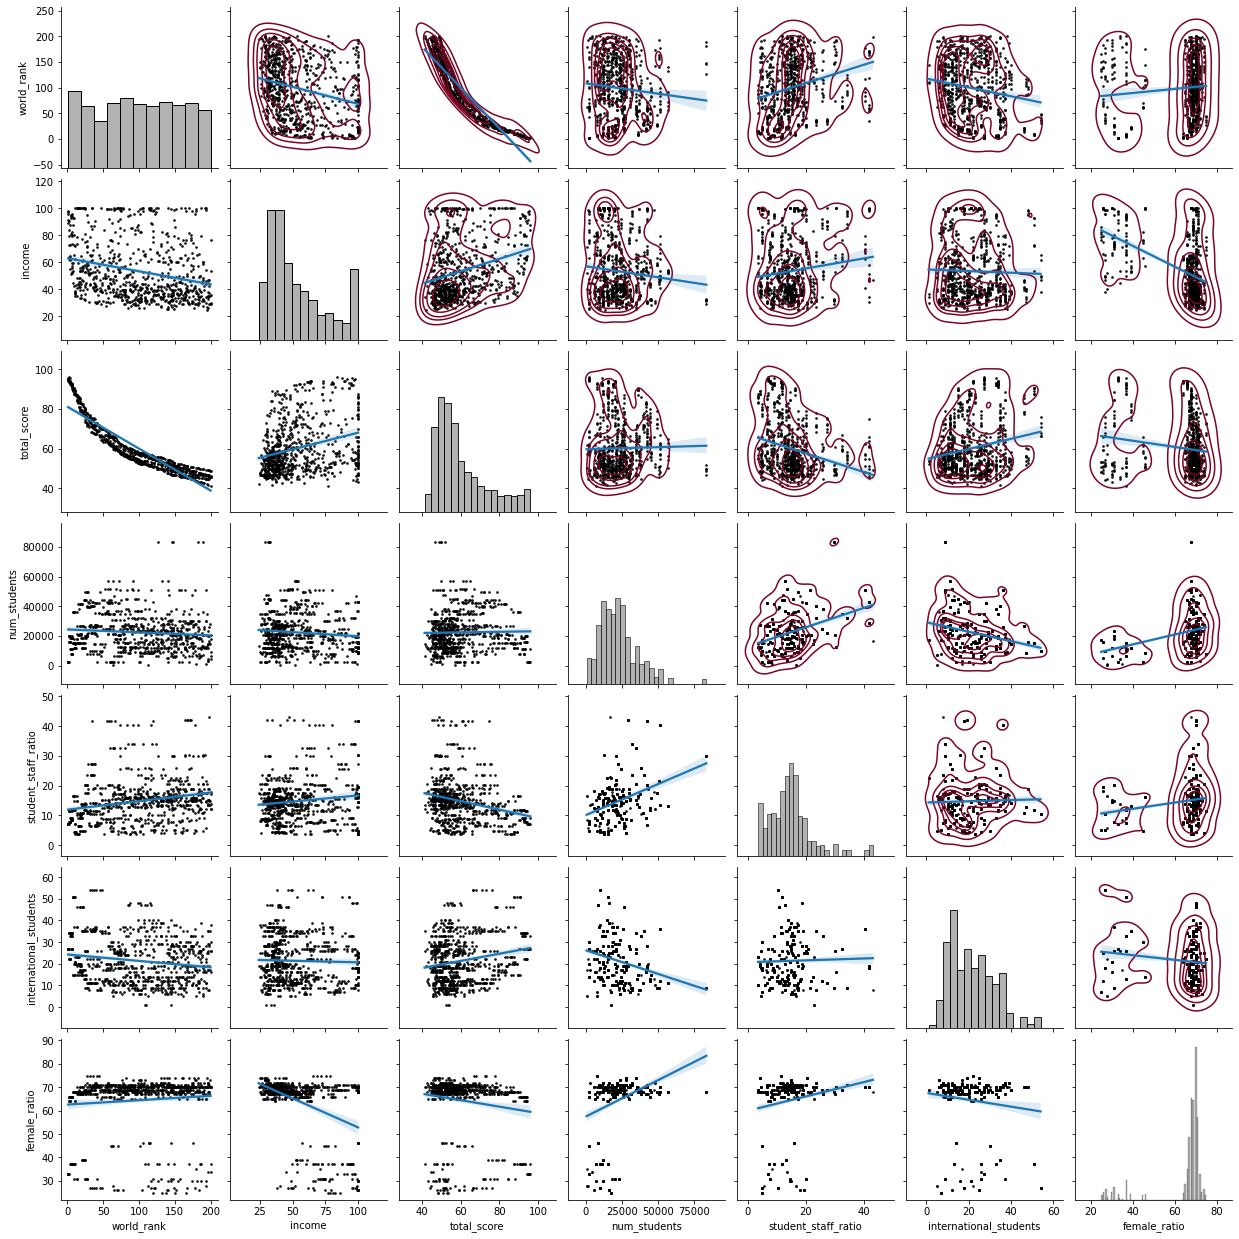

In [36]:
import seaborn as sns
p = sns.pairplot(df_final, diag_kws={'color':'gray', 'alpha':0.6}, kind='reg', plot_kws={'scatter_kws':{'color':'black', 's':3}},
                vars=['world_rank', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students',
                'female_ratio'])
p.map_upper(sns.kdeplot, n_levels=6, color='xkcd:wine red')

In [41]:
import plotly.figure_factory as ff
import numpy as np
from chart_studio.plotly import iplot  
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

data = df_final.loc[:,["research","international", "total_score"]] 
data["index"] = np.arange(1,len(data)+1)

fig = ff.create_scatterplotmatrix(data, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

ModuleNotFoundError: No module named 'chart_studio'

In [39]:
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x=df_final.world_rank,
    y=df_final.research,
    z=df_final.citations,
    mode='markers',
    text=df_final.university_name,
    marker=dict(
        size=5,
        color=df_final.index,
        colorscale='Viridis',))

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    
                     xaxis = dict(
                         title="world rank",
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        title="research",
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        title="citation",
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",)
                    
                 
                 ),
                 title={
                        'text':'world rank,research,citation',
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'left',
                        'yanchor': 'top' })
iplot(fig)

NameError: name 'iplot' is not defined

In [71]:
# prepare data frame
df = df_final.iloc[:100,:]

import plotly.graph_objs as go

#Trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines+markers",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
#Trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'percent',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [72]:
df_final2016 = df_final[df_final.year == 2016].iloc[:20,:]
pie1 = df_final2016.num_students
pie1_list = [str(each).replace(':',' ') for each in df_final2016.num_students]

trace1=go.Bar(x=df_final2016.university_name,
                  y=pie1_list ,
                  name="Number of student",
                  marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                  text = df_final2016.num_students,
                  )
data=[trace1]
layout=dict(title="Number of student",
           xaxis=dict(title="-"),
           yaxis=dict(title="-"),
           )

fig = dict(data = data, layout = layout)
iplot(fig)


###### The chart shows that universities with a higher number of international students tend to have higher rankings.

<AxesSubplot:xlabel='world_rank', ylabel='international_students'>

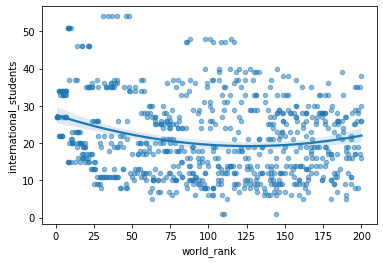

In [92]:
sns.regplot(x='world_rank', y='international_students', data=df_final, order=2, scatter_kws={'s': 20, 'alpha':0.5})

###### The chart shows no clear relationship between the two variables.

<AxesSubplot:xlabel='world_rank', ylabel='female__ratio'>

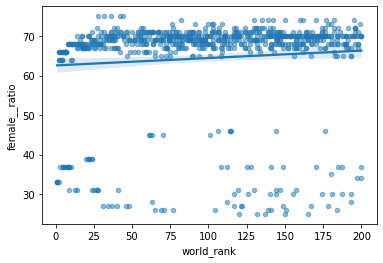

In [93]:
sns.regplot(x='world_rank', y='female_ratio', data=df_final, scatter_kws={'s': 20, 'alpha':0.5})

###### - The R&D is a measure at country level, while the Total score is a measure at university level
###### - The chart shows that as the R&D is higher in a country the universities tend to perform better

<AxesSubplot:xlabel='rnd_2011-12_avg', ylabel='total_score'>

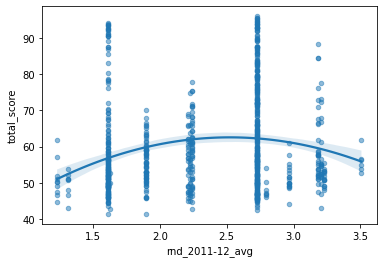

In [98]:
sns.regplot(x='rnd_2011-12_avg', y='total_score', data=df_final, order=2, scatter_kws={'s': 20, 'alpha':0.5})

In [73]:
# prepare data
x2011 = df_final.student_staff_ratio[df_final.year == 2011]
x2012 = df_final.student_staff_ratio[df_final.year == 2012]
x2013 = df_final.student_staff_ratio[df_final.year == 2013]
x2014 = df_final.student_staff_ratio[df_final.year == 2014]
x2015 = df_final.student_staff_ratio[df_final.year == 2015]
x2016 = df_final.student_staff_ratio[df_final.year == 2016]

trace1 = go.Histogram(
    x=x2016,
    opacity=0.75,
    name = "2016",
    marker=dict(color='rgba(255,255,255,1)'))
trace2 = go.Histogram(
    x=x2015,
    opacity=0.75,
    name = "2015",
    marker=dict(color='rgba(173,216,230,1)'))
trace6 = go.Histogram(
    x=x2014,
    opacity=0.75,
    name = "2014",
    marker=dict(color='rgba(211,211,211,1)'))
trace3 = go.Histogram(
    x=x2013,
    opacity=0.75,
    name = "2013",
    marker=dict(color='rgba(144,238,144,1)'))
trace5 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace4 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title={
        'text':'Students-staff ratio year by year',
        'y':0.9,
        'x':0.5,
        'xanchor': 'left',
        'yanchor': 'top' },          
    barmode='overlay',  
    xaxis=dict(title='students-staff ratio'),
    yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

(7.2, 0.8)

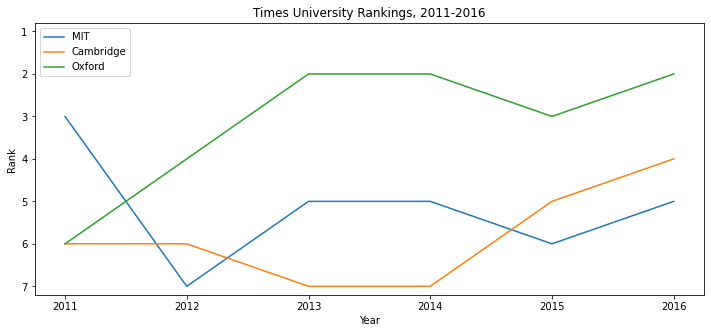

In [123]:
from matplotlib import pyplot as plt
# Preprocess data for plotting
harvard=df_final[df_final.university_name=='Harvard University']
mit=df_final[df_final.university_name=='Massachusetts Institute of Technology']
cambridge=df_final[df_final.university_name=='University of Cambridge']
oxford=df_final[df_final.university_name=='University of Oxford']

harvard.loc[:,'world_rank'] = harvard.loc[:,'world_rank'].astype(float)
mit.loc[:,'world_rank'] = mit.loc[:,'world_rank'].astype(float)
cambridge.loc[:,'world_rank'] = cambridge.loc[:,'world_rank'].astype(float)
oxford.loc[:,'world_rank'] = oxford.loc[:,'world_rank'].astype(float)

plt.figure(figsize=(12,5))

# Lineplot, one for each selected uni
sns.lineplot(x='year', y='world_rank', data=harvard, label='Harvard')
sns.lineplot(x='year', y='world_rank', data=mit, label='MIT')
sns.lineplot(x='year', y='world_rank', data=cambridge, label='Cambridge')
sns.lineplot(x='year', y='world_rank', data=oxford, label='Oxford')

# Aesthetics
plt.title('Times University Rankings, 2011-2016')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.ylim(7.2,0.8)

### Finally, we create an aggregate table on key indicators on a countnry level

In [51]:
# Pivot

t1 = df_final.groupby("country")["num_students"].sum().reset_index()
t2 = df_final.groupby("country")["total_score"].mean().reset_index().rename(columns={'total_score':'mean_score'})
t3 = df_final.groupby("country")["total_score"].std().reset_index().rename(columns={'total_score':'sdt_score'})
t4 = df_final.groupby("country")["rnd_2011-12_avg"].mean().reset_index()
t5 = df_final
t5["females"] = df_final["female_ratio"]*df_final["num_students"]/100
t5 = t5.groupby("country")["females"].sum().reset_index()


df_pivot = pd.merge(pd.merge(pd.merge(pd.merge(t1,t2),t3),t4),t5).head(20)
df_pivot["female_ratio"]=df_pivot["females"]/df_pivot["num_students"]*100
df_pivot

,country,num_students,mean_score,sdt_score,rnd_2011-12_avg,females,female_ratio
0,Australia,1495789.0,59.963636,8.996436,2.237650,1035277.86,69.212827
1,Austria,226115.0,48.471429,2.843539,2.791700,166596.74,73.677881
2,Belgium,641678.0,54.609524,7.632425,2.227230,451104.56,70.300768
3,Denmark,368580.0,51.555556,3.855206,2.962950,238842.60,64.800749
4,Finland,141030.0,56.033333,3.247563,3.508190,102951.90,73.000000
5,France,289358.0,56.142308,7.209836,2.209340,195660.57,67.618856
6,Italy,18534.0,54.575000,6.031791,1.231870,11979.75,64.636614
7,Japan,249650.0,51.460000,2.163595,3.226925,75107.30,30.085039
8,Netherlands,1224382.0,55.693939,6.070582,1.898790,790295.16,64.546454
9,New Zealand,178722.0,48.633333,2.831725,1.230650,125105.40,70.000000


<AxesSubplot:xlabel='rnd_2011-12_avg', ylabel='mean_score'>

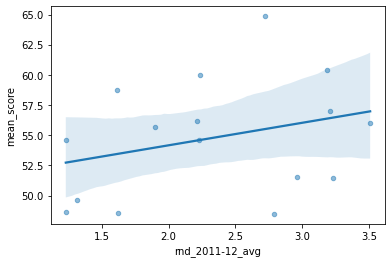

In [55]:
sns.regplot(x='rnd_2011-12_avg', y='mean_score', data=df_pivot, scatter_kws={'s': 20, 'alpha':0.5})